## WorkFlow

### [Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)


### Pre-Processing & Analyasis

### Modelling

### Evaluation

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.isnull().sum().sum()

0

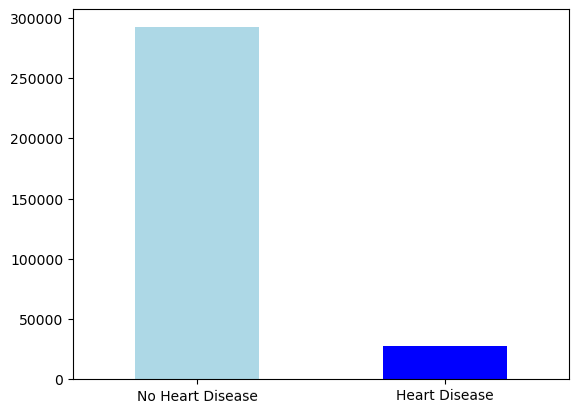

In [5]:
labels = ["No Heart Disease", "Heart Disease"]

fig = df['HeartDisease'].value_counts().plot(kind = 'bar', color=["lightblue", 'b'])
fig.set_xticklabels(labels=labels, rotation=0.1)
plt.show()

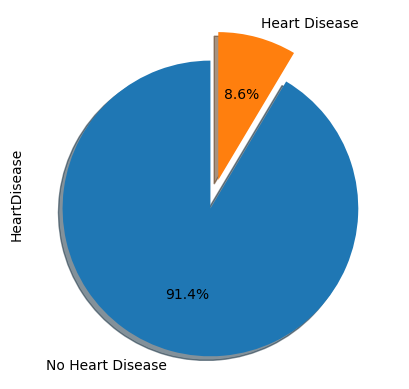

In [6]:
fig = df['HeartDisease'].value_counts().plot.pie
fig(autopct='%1.1f%%', startangle = 90,  shadow=True, explode=[0.1,0.1], labels=labels, )
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Set Columns with type Object
obj_cols = df.dtypes[df.dtypes=='object'].index

encoder = LabelEncoder()

for i in obj_cols:
    df[i] = encoder.fit_transform(df[i])
    
df['Smoking'].value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

In [8]:
new_df = df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1)
new_df.head(5)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,3.0,30.0,0,0,7,5,2,1,0,1
1,0,20.34,0,1,0.0,0.0,0,0,12,5,0,0,0,0
2,0,26.58,1,0,20.0,30.0,0,1,9,5,2,1,0,0
3,0,24.21,0,0,0.0,0.0,0,0,11,5,0,0,0,1
4,0,23.71,0,0,28.0,0.0,1,0,4,5,0,0,0,0


In [9]:
new_df.shape

(319795, 14)

In [19]:
X = df.drop('HeartDisease',axis=1).values
y = df['HeartDisease'].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 17) 
 y_shape: (319795,)


In [20]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=42)
x_new , y_new = over.fit_resample(X,y)

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.70,random_state=42) 

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [23]:
extra.score(xtest,ytest)

0.971627891071164

In [27]:
ypred = extra.predict(xtest)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
print('confusion matrix : \n{}'.format(confusion_matrix(ytest,ypred)))
print('\nAccuracy : {}%'.format(round(accuracy_score(ytest,ypred),5)*100))
print('classification report : \n{}'.format(classification_report(ytest,ypred)) )

confusion matrix : 
[[82712  4864]
 [  114 87764]]

Accuracy : 97.163%
classification report : 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     87576
           1       0.95      1.00      0.97     87878

    accuracy                           0.97    175454
   macro avg       0.97      0.97      0.97    175454
weighted avg       0.97      0.97      0.97    175454



In [41]:
from sklearn.metrics import precision_recall_curve

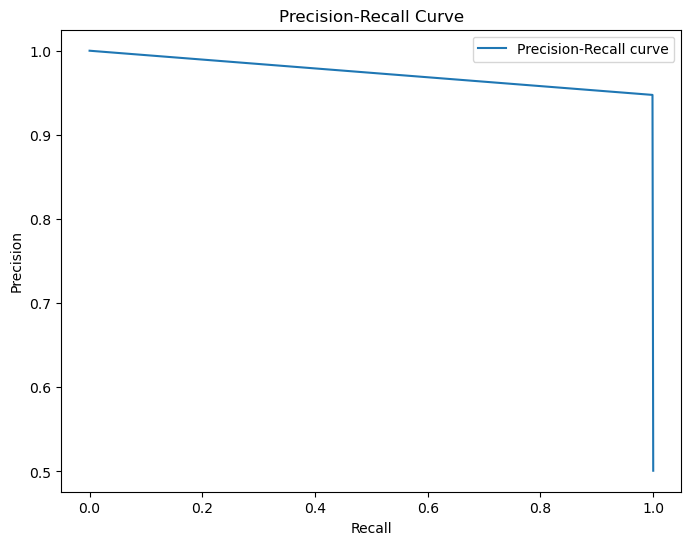

In [43]:
precision, recall, _ = precision_recall_curve(ytest, ypred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

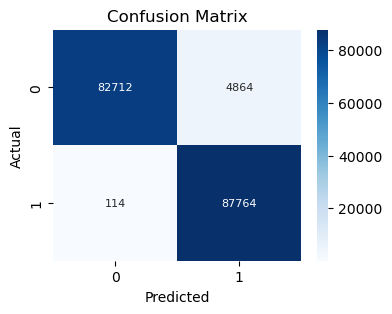

In [48]:
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 8})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()